<a href="https://colab.research.google.com/github/nilusrubanathan-byte/skills-introduction-to-github/blob/main/Assignment_2_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#load data
import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print("Training images shape:", train_images.shape)   # (50000, 32, 32, 3)
print("Training labels shape:", train_labels.shape)   # (50000, 1)
print("Test images shape:", test_images.shape)         # (10000, 32, 32, 3)
print("Test labels shape:", test_labels.shape)         # (10000, 1)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [41]:
#sample image



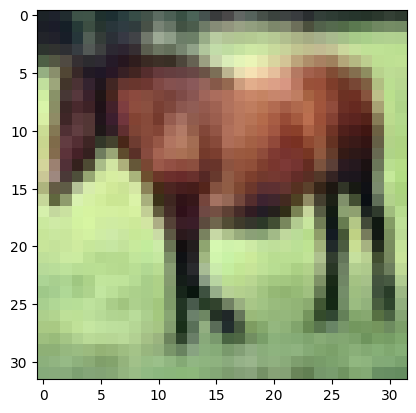

In [42]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_images[7])
plt.show()

In [44]:
train_labels[7]

array([7], dtype=uint8)

In [46]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Rescaling(1./255),
    #convolutional (understanding the images ) and fully connected (classification)
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    # dropout - select different % and seee
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

early stopping : Best practices for setting epochs
Instead of picking an arbitrary number of epochs, a common and more robust practice is to use early stopping. This technique monitors the model's performance on the validation set during training and stops the training process automatically if the performance stops improving. This prevents overfitting and finds the optimal number of epochs without having to guess beforehand.

In [57]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

In [55]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

NameError: name 'callbacks' is not defined

In [58]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 55ms/step - accuracy: 0.2804 - loss: 1.9020 - val_accuracy: 0.5120 - val_loss: 1.3675
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.5012 - loss: 1.3596 - val_accuracy: 0.5803 - val_loss: 1.1883
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.5721 - loss: 1.2143 - val_accuracy: 0.6302 - val_loss: 1.0381
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.6105 - loss: 1.1018 - val_accuracy: 0.6645 - val_loss: 0.9617
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.6441 - loss: 1.0151 - val_accuracy: 0.6762 - val_loss: 0.9267
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.6547 - loss: 0.9789 - val_accuracy: 0.6923 - val_loss: 0.8762
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.6732 - loss: 0.9162 - val_accuracy: 0.6946 - val_loss: 0.8843
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.6878 -

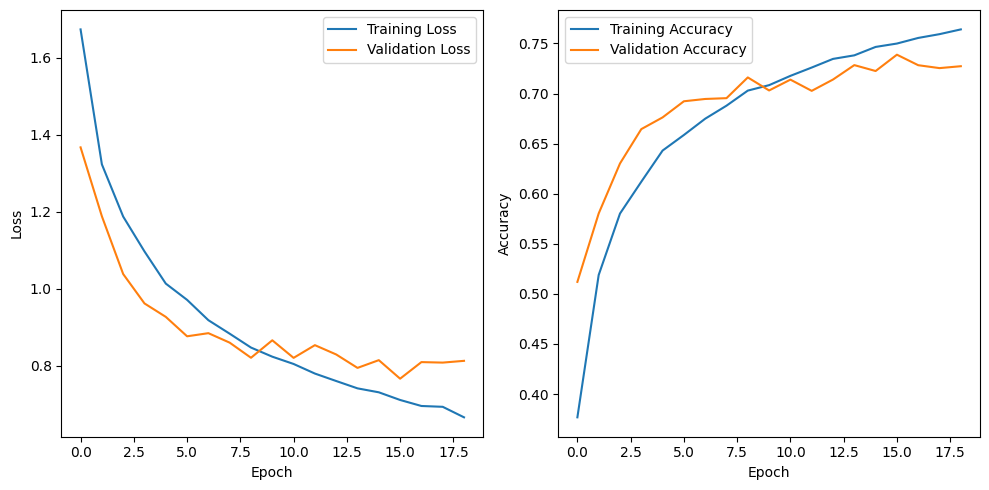

In [59]:
# Plot the accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Add your text here.

In [ ]:
find TOP,TN,AND FP

In [60]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7265 - loss: 0.7812
Test accuracy: 0.7318000197410583
Test loss: 0.7838095426559448


# Task
Verify data augmentation and display examples of images to ensure

## Define data augmentation

### Subtask:
Define the data augmentation layers (e.g., random flips, rotations, zooms).


**Reasoning**:
Define the data augmentation layers as requested in the instructions.



In [98]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(factor=0.1),
    RandomZoom(height_factor=0.1, width_factor=0.1),
])

## Create data augmentation pipeline

### Subtask:
Create a `Sequential` model with the defined data augmentation layers.


**Reasoning**:
Create a new Sequential model and add the data augmentation layers to it.



In [99]:
model_with_augmentation = keras.Sequential([
    data_augmentation,
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=10, activation='softmax')
])

model_with_augmentation.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_11 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_11 (Rescaling)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Apply data augmentation and visualize

### Subtask:
Apply the data augmentation pipeline to a batch of images and display some examples of the augmented images.


**Reasoning**:
Apply the data augmentation pipeline to a batch of images and display some examples of the augmented images.



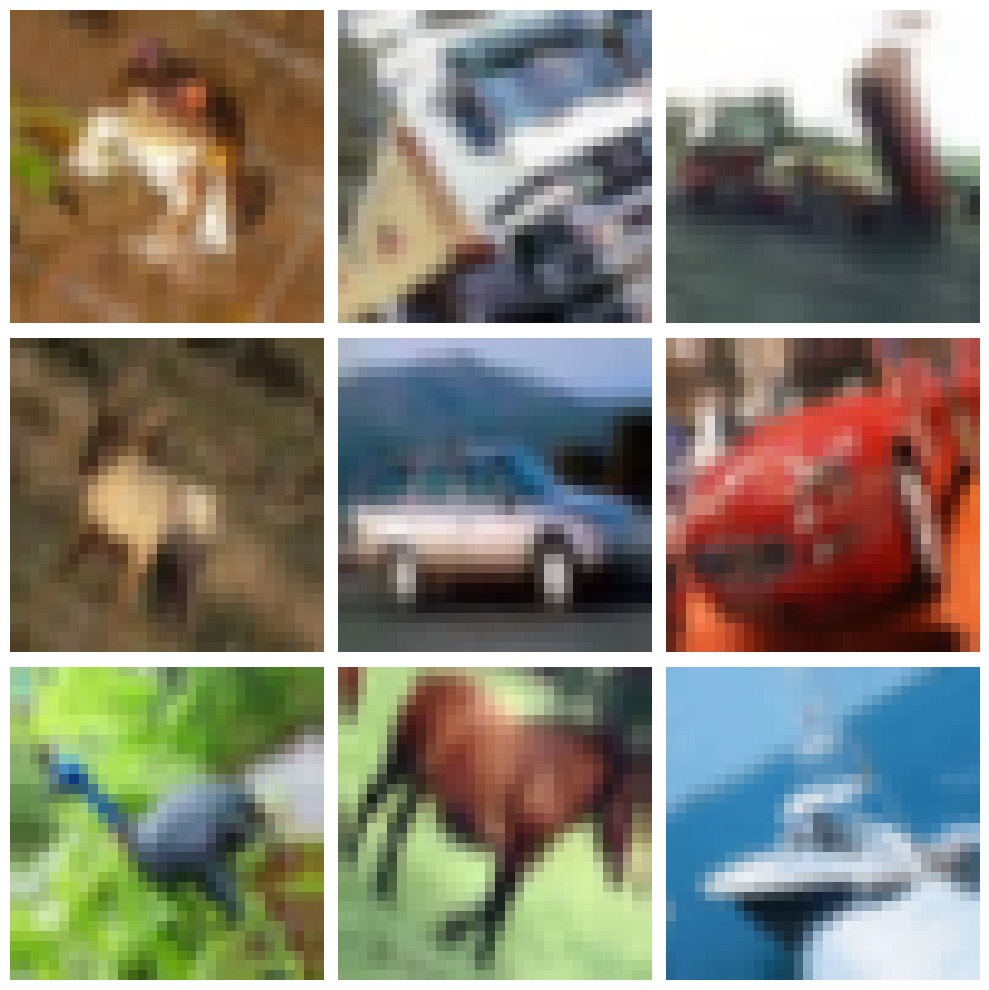

In [100]:
import matplotlib.pyplot as plt

# Select a batch of images
sample_images = train_images[:9]

# Apply data augmentation
augmented_images = data_augmentation(sample_images)

# Plot original and augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.axis("off")
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A `keras.Sequential` model named `data_augmentation` was successfully created, incorporating `RandomFlip` (horizontal), `RandomRotation` (factor=0.1), and `RandomZoom` (height\_factor=0.1, width\_factor=0.1) layers.
*   A larger `keras.Sequential` model named `model_with_augmentation` was built, with the previously defined `data_augmentation` layer included as the first step in the pipeline, followed by standard convolutional network layers.
*   The data augmentation pipeline was successfully applied to a batch of 9 sample images from the training dataset.
*   Visual inspection of the augmented images confirms that the defined transformations (flipping, rotation, zooming) have been applied to the original images.

### Insights or Next Steps

*   The visualized augmented images confirm that the data augmentation layers are functioning as expected and are ready to be used during model training to increase data variability.
*   Proceed with compiling and training the `model_with_augmentation` using the augmented data to evaluate its performance.
